        Date Slot No.  Alpha_Sensor     Winsen       Temp     RelHum  \
0 2022-02-16   SLOT-1     13.576949  46.525424  33.335593  36.044068   
1 2022-02-16   SLOT-2     20.209000  57.650000  31.773333  39.555000   
2 2022-02-16   SLOT-3     28.051333  75.271186  30.925000  43.186667   
3 2022-02-16   SLOT-4     30.546833  96.383333  30.323333  45.185000   
4 2022-02-16   SLOT-5     26.522667  68.516667  29.631667  46.923333   

  Slot No..1  Hours          Time  Speed  Direction  
0       SLOT      1  16-02-2022-1   0.49     323.50  
1       SLOT      2  16-02-2022-2   0.46     331.70  
2       SLOT      3  16-02-2022-3   0.46     341.26  
3       SLOT      4  16-02-2022-4   0.47     351.47  
4       SLOT      5  16-02-2022-5   0.50       0.90  
(313, 6)
Loss functions:
* R-squared = -37.530784259030675
* RMSE = 25.2050100210336
* MAE = 23.735991021359325
        Date Slot No.  Alpha_Sensor     Winsen       Temp     RelHum  \
0 2022-02-16   SLOT-1     13.576949  46.525424  33.335593  

<ipython-input-1-bc050c607290>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Winsen_Alpha_Sensor_factor["Alpha_Sensor"] = 4*Winsen_Alpha_Sensor_factor["Alpha_Sensor"]


Correlation:  0.8149367336504659


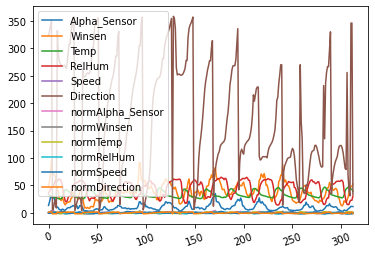

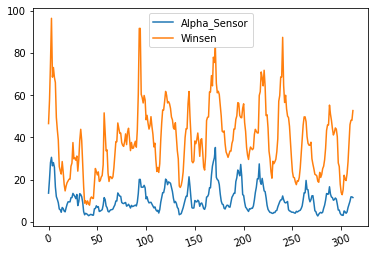

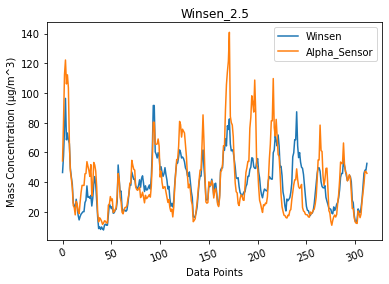

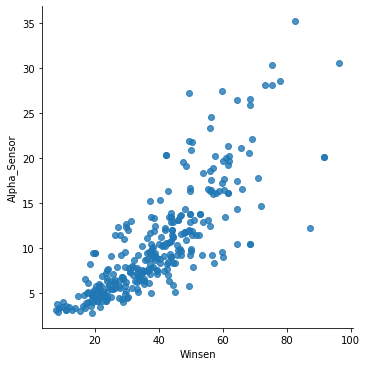

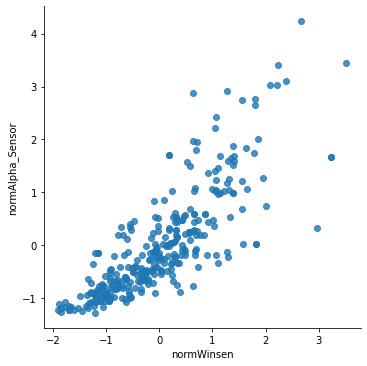

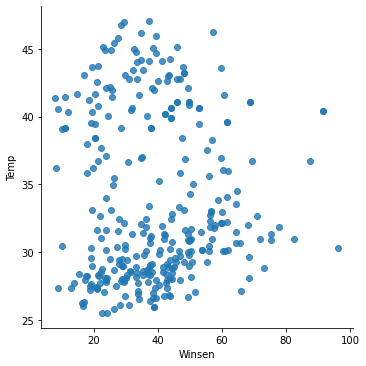

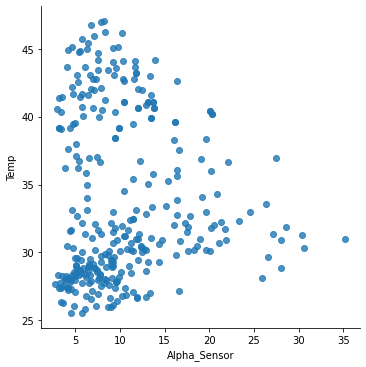

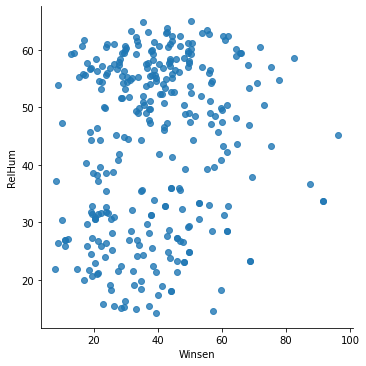

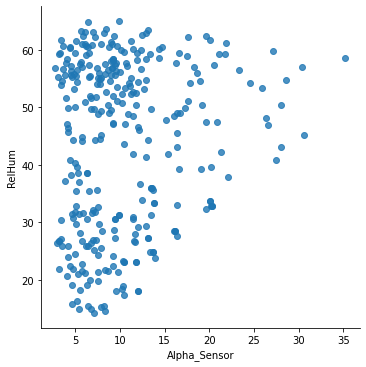

In [1]:
import pandas as pd # for data handling
import matplotlib.pyplot as plt # for linear plot
import seaborn as sns # for scatter plot
from sklearn.model_selection import train_test_split
import datetime
import math

#%%
# Read sensor data
sensor = pd.read_excel("Winsen 2.5.xlsx", sheet_name = "75")
print(sensor.head())

# Build main dataset
df = pd.DataFrame({'Alpha_Sensor': sensor["Alpha_Sensor"], 'Winsen': sensor["Winsen"], 'Temp': sensor["Temp"], 'RelHum': sensor["RelHum"],
                  'Speed': sensor["Speed"], 'Direction': sensor["Direction"]})
print(df.shape)

# Split main dataset and build train and test datasets
X = df[['Winsen', 'Temp', 'RelHum', "Speed", "Direction"]]
Y = df['Alpha_Sensor']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1, shuffle = False)

df_train = pd.DataFrame({'Alpha_Sensor': Y_train, 'Winsen': X_train["Winsen"], 'Temp': X_train["Temp"], 'RelHum': X_train["RelHum"],
                        'Speed': X_train["Speed"],'Direction': X_train["Direction"]})
df_test = pd.DataFrame({'Alpha_Sensor': Y_test, 'Winsen': X_test["Winsen"], 'Temp': X_test["Temp"], 'RelHum': X_test["RelHum"],
                       'Speed': X_test["Speed"], 'Direction': X_test["Direction"]})

#%%
# Loss functions definition
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def loss_functions(y_true, y_pred):
    print("Loss functions:")
    print("* R-squared =", r2_score(y_true, y_pred))
    MSE = mean_squared_error(y_true, y_pred)
    print("* RMSE =", math.sqrt(MSE))
    print("* MAE =", mean_absolute_error(y_true, y_pred))
    
# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["Winsen"])

# %%
# Normalise sensor data
def normalize(col):
    μ = col.mean()
    σ = col.std()
    return (col - μ)/σ

df["normAlpha_Sensor"] = normalize(df["Alpha_Sensor"])
df["normWinsen"] = normalize(df["Winsen"])
df["normTemp"] = normalize(df["Temp"])
df["normRelHum"] = normalize(df["RelHum"])
df["normSpeed"] = normalize(df["Speed"])
df["normDirection"] = normalize(df["Direction"])

#%%
# Intro to Pandas
# Print first top lines from data
print(sensor.head(5))

#%%
# Print all data types
print(sensor.dtypes)

#%%
# Show data info summary
print(sensor.info())

#%%
# Select and print specific columns
Temp_Winsen = sensor[["Temp", "Winsen"]]
print(Temp_Winsen.head(5))

#%%
# Simple plot
df.plot()
plt.xticks(rotation = 20)

#%%
# Data observation
# Plot the ozone (KOhms) and ozone reference data (μgr/m^3) as function of time
df[["Alpha_Sensor", "Winsen"]].plot()
plt.xticks(rotation = 20)

# %%
# Plot the ozone (KOhms) and ozone reference data (μgr/m^3) as function of time - factor
Winsen_Alpha_Sensor_factor = df[["Winsen", "Alpha_Sensor"]]
Winsen_Alpha_Sensor_factor["Alpha_Sensor"] = 4*Winsen_Alpha_Sensor_factor["Alpha_Sensor"]
Winsen_Alpha_Sensor_factor.plot()
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.title("Winsen_2.5")
plt.xticks(rotation = 20)

# %%
# Raw scatter plot
sns.lmplot(x = 'Winsen', y = 'Alpha_Sensor', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# Normalised scatter plot
sns.lmplot(x = 'normWinsen', y = 'normAlpha_Sensor', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# Temp with respect to Winsen
sns.lmplot(x = 'Winsen', y = 'Temp', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# Temp with respect to Alpha_Sensor
sns.lmplot(x = 'Alpha_Sensor', y = 'Temp', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# RelHum with respect to Winsen
sns.lmplot(x = 'Winsen', y = 'RelHum', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# RelHum with respect to Alpha_Sensor
sns.lmplot(x = 'Alpha_Sensor', y = 'RelHum', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)

y = df["Winsen"].tolist()
y = pd.Series(y)

corr = y.corr(x)
print("Correlation: ", corr)

Intercept: 
 -3.678933143581247
Coefficients: 
 [ 0.25680916  0.07131151  0.06622957 -2.70943426  0.0050885 ]
Loss functions:
* R-squared = 0.12766931249271996
* RMSE = 3.7924819755155377
* MAE = 3.4931569392600625
Intercept: 
 [10.1843038]
Coefficients: 
 [ 4.0074848   0.1074663   0.61578062 -1.52065324  0.37721091]
Iters: 
 5
{'alpha': 0.0001, 'average': False, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.01, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'invscaling', 'loss': 'squared_loss', 'max_iter': 5, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.25, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Loss functions:
* R-squared = 0.708558840627102
* RMSE = 2.1920900611781287
* MAE = 1.6484302292758608
Correlation_MLR_Pred:  0.8630681326445251
Correlation_MLR_SGD_Pred:  0.8452139393075683


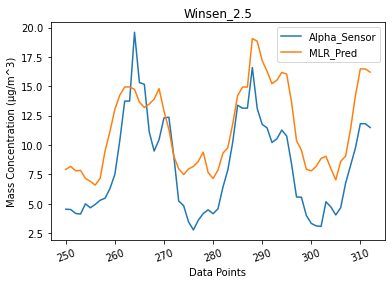

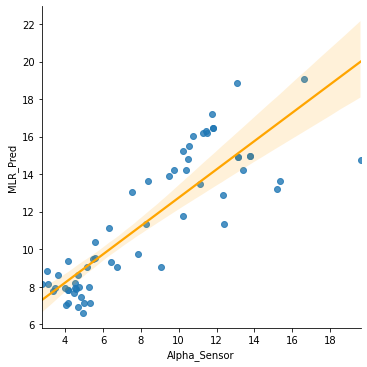

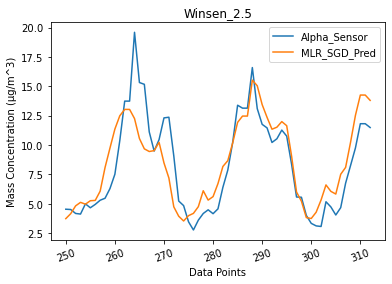

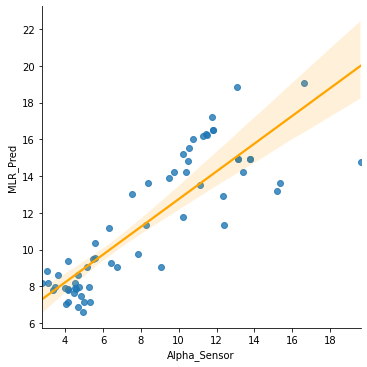

In [2]:
# %%
# Data calibration
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression

# Model
lr = LinearRegression()

# Fit
lr.fit(X_train, Y_train)

# Get MLR coefficients
print('Intercept: \n', lr.intercept_)
print('Coefficients: \n', lr.coef_)

# Predict
df_test["MLR_Pred"] = lr.intercept_ + lr.coef_[0]*df_test["Winsen"] + lr.coef_[1]*df_test["Temp"] + lr.coef_[2]*df_test["RelHum"] + lr.coef_[2]*df_test["RelHum"] + lr.coef_[3]*df_test["Speed"] + lr.coef_[4]*df_test["Direction"]
type(df_test["MLR_Pred"])
# Plot linear
df_test[["Alpha_Sensor", "MLR_Pred"]].plot()
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.title("Winsen_2.5")
plt.xticks(rotation = 20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'MLR_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["MLR_Pred"])

# %%
# Multiple Linear Regression with Stochastic Gradient Descent
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# Model
# sgdr = SGDRegressor(loss='squared_loss', alpha=.001, tol=1e-5)
sgdr = SGDRegressor(loss = 'squared_loss', max_iter = 5)

# Normalize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fit
sgdr.fit(X_train, Y_train)

# Get MLR coefficients
print('Intercept: \n', sgdr.intercept_)
print('Coefficients: \n', sgdr.coef_)
print('Iters: \n', sgdr.n_iter_)
print(sgdr.get_params())

# Predict
# df_test["MLR_SGDR_Pred"] = sgdr.intercept_ + sgdr.coef_[0]*X_test[0] + sgdr.coef_[1]*X_test[1] - sgdr.coef_[2]*X_test[2]
df_test["MLR_SGD_Pred"] = sgdr.predict(X_test)

# Plot linear
df_test[["Alpha_Sensor", "MLR_SGD_Pred"]].plot()
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.title("Winsen_2.5")
plt.xticks(rotation = 20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'MLR_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["MLR_SGD_Pred"])

x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)
corr_MLR_Pred = df_test["MLR_Pred"].corr(x)
corr_MLR_SGD_Pred = df_test["MLR_SGD_Pred"].corr(x)
print("Correlation_MLR_Pred: ", corr_MLR_Pred)
print("Correlation_MLR_SGD_Pred: ", corr_MLR_SGD_Pred)

     Alpha_Sensor     Winsen       Temp     RelHum  Speed  Direction  \
250      4.535517  23.783333  27.944828  55.696552   1.65     117.42   
251      4.511667  21.101695  27.313333  56.328333   1.31     114.73   
252      4.174576  20.900000  27.354237  46.484746   0.93     104.15   
253      4.122167  18.830508  27.231667  45.671667   0.64      84.43   
254      4.991695  17.600000  28.250847  40.369492   0.50      61.03   
..            ...        ...        ...        ...    ...        ...   
308      8.246897  37.279661  47.056897  15.468966   0.06      39.81   
309      9.751228  46.008333  45.131579  21.410526   0.05      30.96   
310     11.818393  48.075000  43.253571  23.048214   0.03     345.96   
311     11.818393  48.075000  43.253571  23.048214   0.03     345.96   
312     11.492241  52.680672  39.432759  30.617241   0.25      33.69   

      MLR_Pred  MLR_SGD_Pred   KNN_Pred  
250   7.926074      3.732754   6.761916  
251   8.183577      4.154752   6.316867  
252   7.8

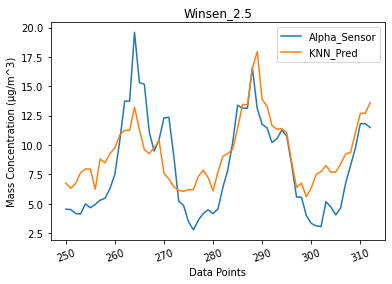

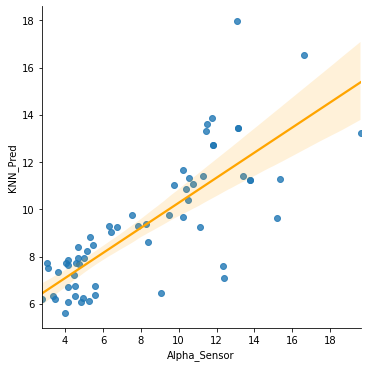

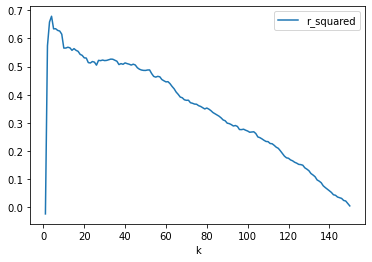

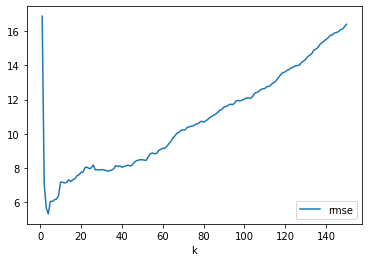

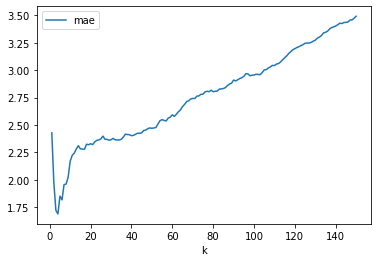

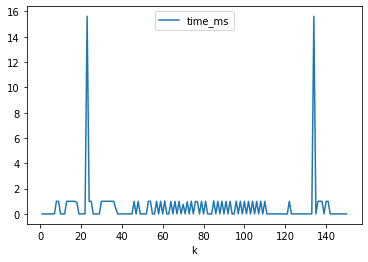

In [3]:
# %%
# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsRegressor

# Model
knn = KNeighborsRegressor(n_neighbors = 19)

# Fit
knn.fit(X_train, Y_train)

# Predict
df_test["KNN_Pred"] = knn.predict(X_test)
print(df_test)

# Plot linear
df_test[["Alpha_Sensor", "KNN_Pred"]].plot()
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.title("Winsen_2.5")
plt.xticks(rotation=20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'KNN_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["KNN_Pred"])

# %%
# K-Nearest Neighbor stats vs. hyperparameters
def knn_stats():
    knn_aux = pd.DataFrame({'Alpha_Sensor': Y_test})

    n_neighbors = [*range(1, 151, 1)]
    r_squared = []
    rmse = []
    mae = []
    time_ms = []

    for i in n_neighbors:
        # Model
        knn = KNeighborsRegressor(n_neighbors=i)

        # Fit
        start_time = float(datetime.datetime.now().strftime('%S.%f'))
        knn.fit(X_train, Y_train)
        end_time = float(datetime.datetime.now().strftime('%S.%f'))
        execution_time = (end_time - start_time) * 1000

        # Predict
        knn_aux["KNN_Pred"] = knn.predict(X_test)

        # Loss
        r_squared.append(r2_score(knn_aux["Alpha_Sensor"], knn_aux["KNN_Pred"]))
        rmse.append(mean_squared_error(knn_aux["Alpha_Sensor"], knn_aux["KNN_Pred"]))
        mae.append(mean_absolute_error(knn_aux["Alpha_Sensor"], knn_aux["KNN_Pred"]))
        time_ms.append(execution_time)

    knn_stats = pd.DataFrame({'k': n_neighbors, 'r_squared': r_squared, 'rmse': rmse, 'mae': mae, 'time_ms': time_ms})
    knn_stats = knn_stats.set_index('k') # index column (X axis for the plots)
    print(knn_stats)

    # plot
    knn_stats[["r_squared"]].plot()
    knn_stats[["rmse"]].plot()
    knn_stats[["mae"]].plot()
    knn_stats[["time_ms"]].plot()

knn_stats()

x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)
corr_KNN_Pred = df_test["KNN_Pred"].corr(x)
print("Correlation_KNN_Pred: ", corr_KNN_Pred)

     Alpha_Sensor     Winsen       Temp     RelHum  Speed  Direction  \
250      4.535517  23.783333  27.944828  55.696552   1.65     117.42   
251      4.511667  21.101695  27.313333  56.328333   1.31     114.73   
252      4.174576  20.900000  27.354237  46.484746   0.93     104.15   
253      4.122167  18.830508  27.231667  45.671667   0.64      84.43   
254      4.991695  17.600000  28.250847  40.369492   0.50      61.03   
..            ...        ...        ...        ...    ...        ...   
308      8.246897  37.279661  47.056897  15.468966   0.06      39.81   
309      9.751228  46.008333  45.131579  21.410526   0.05      30.96   
310     11.818393  48.075000  43.253571  23.048214   0.03     345.96   
311     11.818393  48.075000  43.253571  23.048214   0.03     345.96   
312     11.492241  52.680672  39.432759  30.617241   0.25      33.69   

      MLR_Pred  MLR_SGD_Pred   KNN_Pred    RF_Pred  
250   7.926074      3.732754   6.761916   4.698411  
251   8.183577      4.154752 

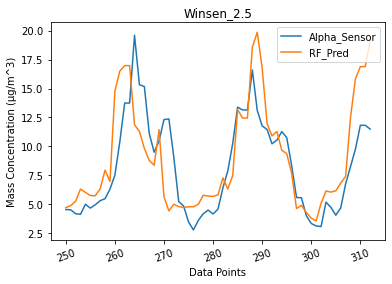

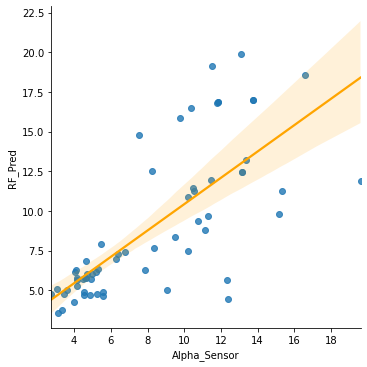

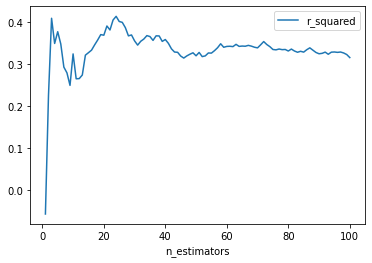

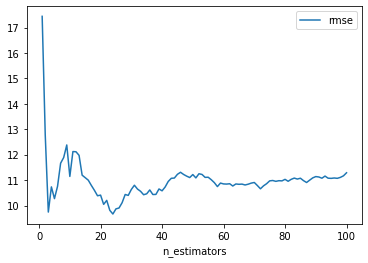

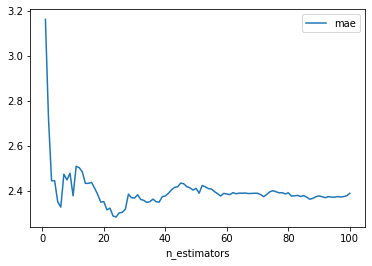

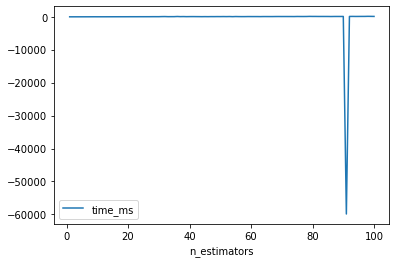

In [4]:
# %%
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Model
rf = RandomForestRegressor(n_estimators = 20 ,random_state = 0)

# Fit
rf.fit(X_train, Y_train)

# Predict
df_test["RF_Pred"] = rf.predict(X_test)
print(df_test)

# Plot linear
df_test[["Alpha_Sensor", "RF_Pred"]].plot()
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.title("Winsen_2.5")
plt.xticks(rotation = 20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'RF_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["RF_Pred"])

# RF feature importances
print('Feature importances:\n', list(zip(X.columns, rf.feature_importances_)))


# %%
# Random Forest stats vs. hyperparameters
def rf_stats():
    rf_aux = pd.DataFrame({'Alpha_Sensor': Y_test})

    n_estimators = [*range(1, 101, 1)]
    r_squared = []
    rmse = []
    mae = []
    time_ms = []

    for i in n_estimators:
        rf=RandomForestRegressor(n_estimators=i,random_state=0)

        # fit
        start_time = float(datetime.datetime.now().strftime('%S.%f'))
        rf.fit(X_train, Y_train)
        end_time = float(datetime.datetime.now().strftime('%S.%f'))
        execution_time = (end_time - start_time) * 1000

        # predict
        rf_aux["RF_Pred"] = rf.predict(X_test)
        x = df["Alpha_Sensor"].tolist()
        x = pd.Series(x)
        corr = rf_aux["RF_Pred"].corr(x)
        print("Correlation: ", corr)

        # Loss
        r_squared.append(r2_score(rf_aux["Alpha_Sensor"], rf_aux["RF_Pred"]))
        rmse.append(mean_squared_error(rf_aux["Alpha_Sensor"], rf_aux["RF_Pred"]))
        mae.append(mean_absolute_error(rf_aux["Alpha_Sensor"], rf_aux["RF_Pred"]))
        time_ms.append(execution_time)

    rf_stats = pd.DataFrame({'n_estimators': n_estimators, 'r_squared': r_squared, 'rmse': rmse, 'mae': mae, 'time_ms': time_ms})
    rf_stats = rf_stats.set_index('n_estimators') # index column (X axis for the plots)
    print(rf_stats)

    # plot
    rf_stats[["r_squared"]].plot()
    rf_stats[["rmse"]].plot()
    rf_stats[["mae"]].plot()
    rf_stats[["time_ms"]].plot()

rf_stats()
x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)
corr = df_test["RF_Pred"].corr(x)
print("Correlation is : ", corr)

C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


Dot params {'alpha': 150, 'copy_X_train': True, 'kernel__k1': DotProduct(sigma_0=1), 'kernel__k2': WhiteKernel(noise_level=1), 'kernel__k1__sigma_0': 1.0, 'kernel__k1__sigma_0_bounds': (1e-05, 100000.0), 'kernel__k2__noise_level': 1.0, 'kernel__k2__noise_level_bounds': (1e-05, 100000.0), 'kernel': DotProduct(sigma_0=1) + WhiteKernel(noise_level=1), 'n_restarts_optimizer': 0, 'normalize_y': False, 'optimizer': 'fmin_l_bfgs_b', 'random_state': 0}
Loss functions:
* R-squared = 0.502135831048736
* RMSE = 2.8650907713591978
* MAE = 2.5484538913490766
Correlation:  0.8405884219038934


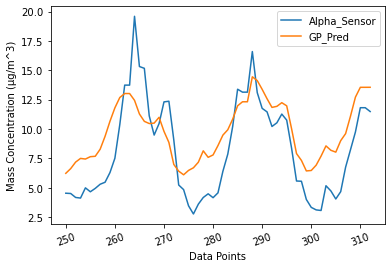

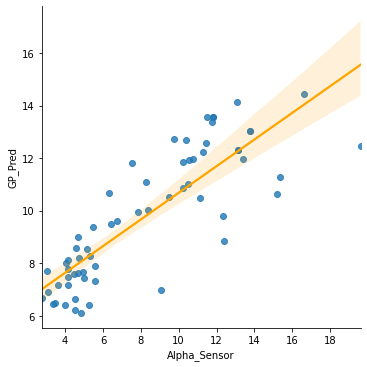

In [5]:
# %%
# Gaussian Process
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, DotProduct, WhiteKernel

# Kernels definition
dpwh = DotProduct() + WhiteKernel()

# Models
gp_dpwh = GaussianProcessRegressor(kernel = dpwh, alpha = 150, random_state = 0)

# Fit
gp_dpwh.fit(X_train, Y_train)

# Predict
df_test["GP_Pred"] = gp_dpwh.predict(X_test)

# Obtain optimized kernel parameters
# l = gp.kernel_.k2.get_params()['length_scale']
# sigma_f = np.sqrt(gp.kernel_.k1.get_params()['constant_value'])

# Print parameters
print("Dot params", gp_dpwh.get_params())

# Plot linear
df_test[["Alpha_Sensor", "GP_Pred"]].plot()
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.xticks(rotation = 20)

# Plot regression 
sns.lmplot(x = 'Alpha_Sensor', y = 'GP_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["GP_Pred"])

x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)
corr = df_test["GP_Pred"].corr(x)
print("Correlation: ", corr)

Loss functions:
* R-squared = -0.7180768723776056
* RMSE = 5.322359992305095
* MAE = 3.737720982197862
Loss functions:
* R-squared = 0.6976580320417424
* RMSE = 2.2327092305137084
* MAE = 1.5069335111883264
Loss functions:
* R-squared = -1.1034641103814717
* RMSE = 5.889121348266404
* MAE = 4.215570806409037
Correlation_corr_lin:  0.8364937727747178


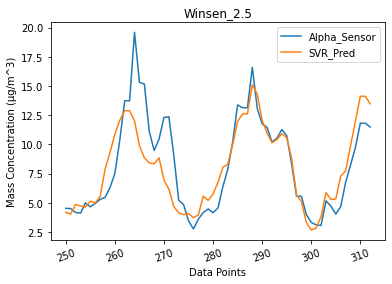

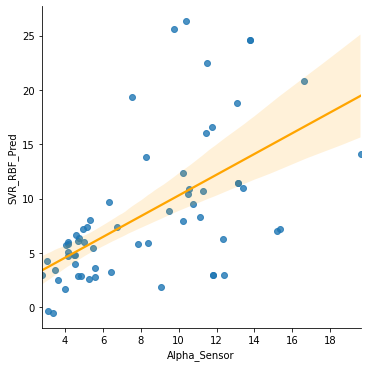

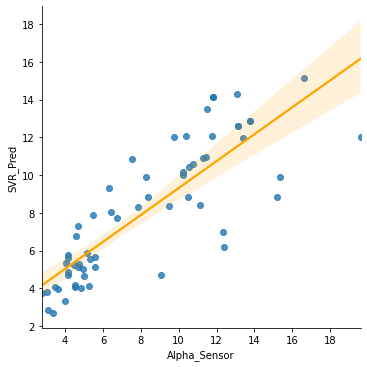

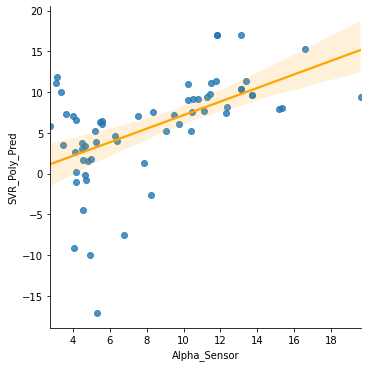

In [6]:
# %%
# Support Vector Regression
from sklearn.svm import SVR

# Models
svr_rbf = SVR(kernel = 'rbf', C = 1e3)#, gamma=0.1)
svr_lin = SVR(kernel = 'linear', C = 1e3)
svr_poly = SVR(kernel = 'poly', C = 1e3, degree = 3)

# Fit
svr_rbf.fit(X_train, Y_train)
svr_lin.fit(X_train, Y_train)
svr_poly.fit(X_train, Y_train)

# Predict
df_test["SVR_RBF_Pred"] = svr_rbf.predict(X_test)
df_test["SVR_Pred"] = svr_lin.predict(X_test)
df_test["SVR_Poly_Pred"] = svr_poly.predict(X_test)

# Plot linear
df_test[["Alpha_Sensor", "SVR_Pred"]].plot()
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.title("Winsen_2.5")
plt.xticks(rotation=20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'SVR_RBF_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 
sns.lmplot(x = 'Alpha_Sensor', y = 'SVR_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 
sns.lmplot(x = 'Alpha_Sensor', y = 'SVR_Poly_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["SVR_RBF_Pred"])
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["SVR_Pred"])
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["SVR_Poly_Pred"])

x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)
corr_lin = df_test["SVR_Pred"].corr(x)
print("Correlation_corr_lin: ", corr_lin)

C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


     Alpha_Sensor     Winsen       Temp     RelHum  Speed  Direction  \
250      4.535517  23.783333  27.944828  55.696552   1.65     117.42   
251      4.511667  21.101695  27.313333  56.328333   1.31     114.73   
252      4.174576  20.900000  27.354237  46.484746   0.93     104.15   
253      4.122167  18.830508  27.231667  45.671667   0.64      84.43   
254      4.991695  17.600000  28.250847  40.369492   0.50      61.03   
..            ...        ...        ...        ...    ...        ...   
308      8.246897  37.279661  47.056897  15.468966   0.06      39.81   
309      9.751228  46.008333  45.131579  21.410526   0.05      30.96   
310     11.818393  48.075000  43.253571  23.048214   0.03     345.96   
311     11.818393  48.075000  43.253571  23.048214   0.03     345.96   
312     11.492241  52.680672  39.432759  30.617241   0.25      33.69   

      MLR_Pred  MLR_SGD_Pred   KNN_Pred    RF_Pred    GP_Pred  SVR_RBF_Pred  \
250   7.926074      3.732754   6.761916   4.698411   6.2

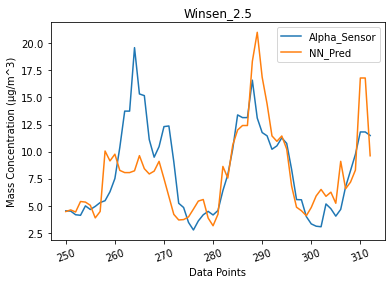

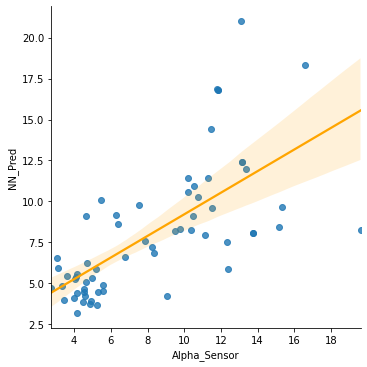

In [7]:
# %%
# Neural Network - SKL
from sklearn.neural_network import MLPRegressor

# Model
mlp = MLPRegressor(hidden_layer_sizes=(16,16), activation='relu', solver='adam', max_iter=1000)

# Fit
mlp.fit(X_train,Y_train)

# Predict
# predict_train = mlp.predict(X_train)
df_test["NN_Pred"] = mlp.predict(X_test)
print(df_test)

# Plot linear
df_test[["Alpha_Sensor", "NN_Pred"]].plot()
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.title("Winsen_2.5")
plt.xticks(rotation=20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'NN_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["NN_Pred"])

x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)
corr_NN = df_test["NN_Pred"].corr(x)
print("Correlation_NN: ", corr_NN)